In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

#*----------------------------------------------------------------
mpl.rcParams['font.sans-serif'] = ['SimHei']# *允许显示中文
plt.rcParams['axes.unicode_minus']=False# *允许显示坐标轴负数
#*----------------------------------------------------------------


Name		        Data Type	Meas.	    Description  
----		        ---------	-----	    -----------  
Sex		            nominal		M, F, and I (infant)  
Length		        continuous	mm	        Longest shell measurement  
Diameter	        continuous	mm	        perpendicular to length  
Height		        continuous	mm	        with meat in shell  
Whole weight	    continuous	grams	    whole abalone  
Shucked weight	    continuous	grams	    weight of meat 肉的重量  
Viscera weight	    continuous	grams	    gut weight (after bleeding) 放完血的重量  
Shell weight	    continuous	grams	    after being dried 风干后的重量  
Rings		        integer		+1.5 gives the age in years     就是鲍鱼壳环的数量 代表年龄，年龄=rings + 1.5  


In [3]:
df = pd.read_csv("abalone.data",sep=",")
df.loc[df["Sex"]=="M","Sex"] = 3  # * 将Male类的鲍鱼设置成3
df.loc[df["Sex"]=="F","Sex"] = 2  # * 将Female类的鲍鱼设置成2
df.loc[df["Sex"]=="I","Sex"] = 1  # * 将Infant类的鲍鱼设置成1
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,3,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,2,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,2,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,3,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,2,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [6]:
data_1 = df[["Shucked weight","Viscera weight"]]
data_1 = data_1.sort_values(by = "Shucked weight") # *对这两列数据进行排序,排序依据为shucked weight
data_1.head(5)

,Shucked weight,Viscera weight
236,0.0010,0.0005
238,0.0025,0.0020
719,0.0045,0.0040
237,0.0045,0.0030
3899,0.0050,0.0035


In [8]:
X1 = data_1["Shucked weight"] # * 构建基础数据和计算权重
length1 = len(X1)
weight_1 = np.linspace (length1 , length1/2, length1) #* 权重
weight_1 = 1 / weight_1

In [11]:
X1 = sm.add_constant(X1)
module1 = sm.WLS(data_1["Viscera weight"],X1,weight = weight_1) #* 进行加权最小二乘回归
result1 = module1.fit()
df["Shucked weight"].corr(df["Viscera weight"],method = "pearson") #* pearson相关系数

E:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.9319613217425599

In [12]:
result1.summary() #* 该模型的summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:         Viscera weight   R-squared:                       0.869
Model:                            WLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 2.759e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        08:00:09   Log-Likelihood:                 7545.9
No. Observations:                4177   AIC:                        -1.509e+04
Df Residuals:                    4175   BIC:                        -1.508e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0152      0.001     12.986      0.000       0.013       0.017
Shucked weight     0.4602      0.003    166.092      0.000       0.455       0.466
==============================================================================
Omnibus:                      360.414   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1789.495
Skew:                           0.260   Prob(JB):                         0.00
Kurtosis:                       6.164   Cond. No.                         5.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

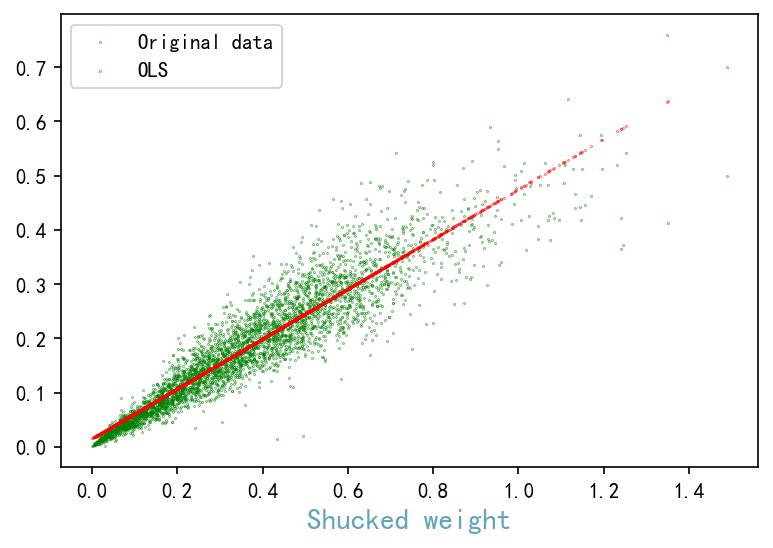

In [14]:
yfitted = result1.fittedvalues # * viscera weight 对 shucked weight的WLS回归
fig, axes = plt.subplots(figsize=(6, 4), dpi=150)
axes.scatter(data_1["Shucked weight"],data_1["Viscera weight"],c = "green",s = 0.05,alpha = 1,label = "Original data")
axes.scatter(data_1["Shucked weight"],yfitted,s= 0.05,c = "red",alpha = 1,label = "OLS")
axes.set_xlabel("Shucked weight",fontsize = 14,color = "#64a5bb")
axes.legend()
plt.savefig('images/test.png')
plt.show()

可以看到上述summary说明，鲍鱼肉的净重和鲍鱼放血前肉的重量存在明显线性性，但是观察可以发现，随着放血前肉的重量的增加  
肉的净重的差异越来越大，说明存在另一个因素影响着肉的净重，其主要影响着该属性的偏差  